#### PART : 1

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fourier_analysis_view(image_path, plot_title='Image Analysis'):
    """
    Perform Fourier analysis and display original image, Fourier spectrum, and normalized spectrum

    Parameters:
    image_path (str): Path to the input image
    plot_title (str): Title for the plot (default: 'Image Analysis')
    """
    # Step 1: Loading Image with OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return

    img = cv2.resize(img, (256, 256))

    # Step 2: Setting the Figure Size with dynamic title
    plt.figure(figsize=(12, 4))
    plt.suptitle(plot_title, fontsize=14, fontweight='bold')

    # Step 3: Original image subplot
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Step 4: Applying Fourier transform steps
    img_processed = img - img.mean()  # Remove mean
    hann = np.outer(np.hanning(256), np.hanning(256))
    img_processed *= hann  # Apply Hann window

    F = np.fft.fftshift(np.fft.fft2(img_processed))
    spectrum = np.log(np.abs(F) + 1)

    # Step 5: Fourier spectrum subplot
    plt.subplot(1, 3, 2)
    plt.imshow(spectrum, cmap='gray')
    plt.title('Fourier Spectrum')
    plt.axis('off')

    # Step 6: Normalized spectrum (ready for model)
    plt.subplot(1, 3, 3)
    normalized = cv2.normalize(spectrum, None, 0, 1, cv2.NORM_MINMAX)
    plt.imshow(normalized, cmap='gray')
    plt.title('Normalized (For Model)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

#### PART : **2**

In [ ]:
def show_laplacian_transformation(image_path, plot_title='Image Analysis'):
    """
    Perform Laplacian transformation and display original, grayscale, and edge-detected images

    Parameters:
    image_path (str): Path to the input image
    plot_title (str): Title for the plot (default: 'Image Analysis')
    """
    # Step 1: Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return

    # Step 2: Convert BGR to RGB (OpenCV uses BGR, matplotlib uses RGB)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(f"==>> img_rgb: {img_rgb}")

    # Step 3: Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(f"==>> gray: {gray}")

    # Step 4: Apply Laplacian transformation
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)

    # Step 5: Convert to absolute values and scale to 0-255
    laplacian_abs = np.absolute(laplacian)
    laplacian_scaled = np.uint8(255 * laplacian_abs / np.max(laplacian_abs))

    # Step 6: Create the plot with dynamic title
    plt.figure(figsize=(15, 5))
    plt.suptitle(plot_title, fontsize=14, fontweight='bold')

    # Step 7: Original image subplot
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Step 8: Grayscale image subplot
    plt.subplot(1, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    # Step 9: Laplacian edges subplot
    plt.subplot(1, 3, 3)
    plt.imshow(laplacian_scaled, cmap='gray')
    plt.title('Laplacian Edges')
    plt.axis('off')

    # Step 10: Display the plot
    plt.tight_layout()
    plt.show()

    # print("Bright areas in the Laplacian image show where edges are detected!")
    # print("Sharp edges = Bright lines, Blurry edges = Faint lines")

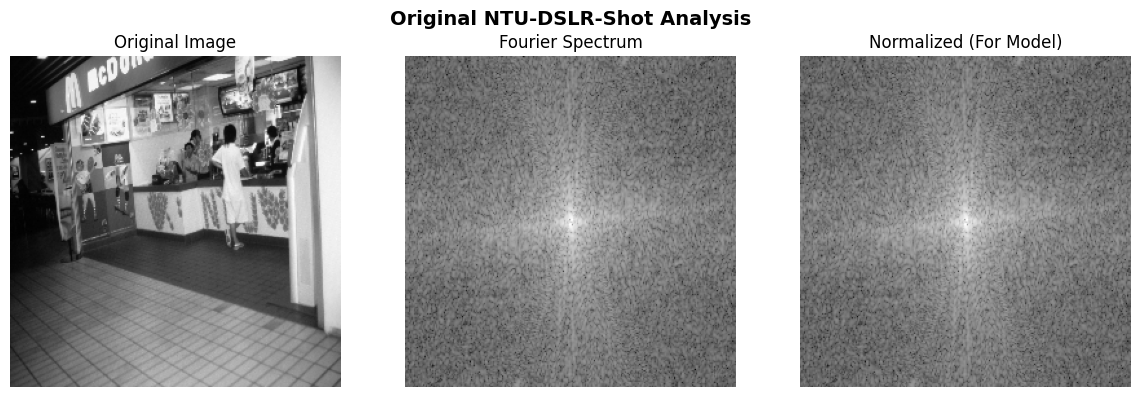

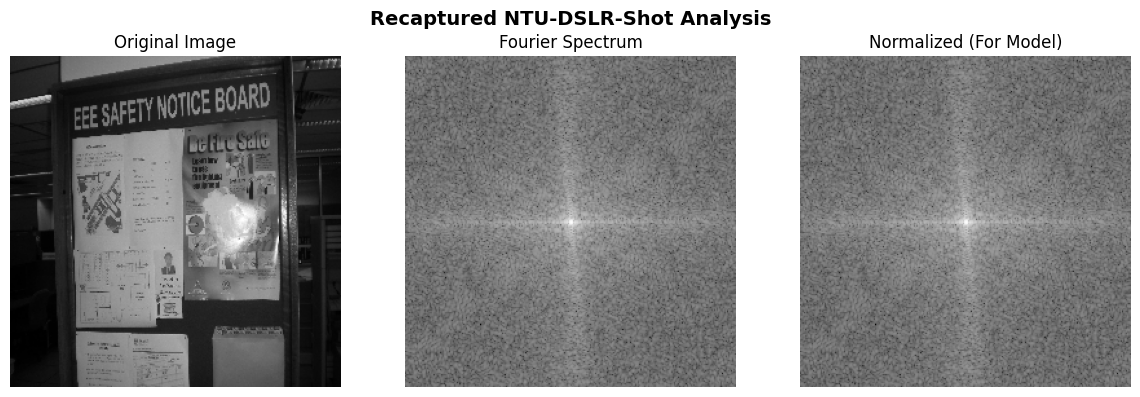

In [15]:
# Fourier Analysis

# For original image
fourier_analysis_view(
    "/content/drive/MyDrive/NTU-Roselab-Dataset/originals/CanonAcer/001.jpg",
    "Original NTU-DSLR-Shot Analysis"
)

# For recaptured image
fourier_analysis_view(
    "/content/drive/MyDrive/NTU-Roselab-Dataset/recaptures/zNikonS210/001.JPG",
    "Recaptured NTU-DSLR-Shot Analysis"
)




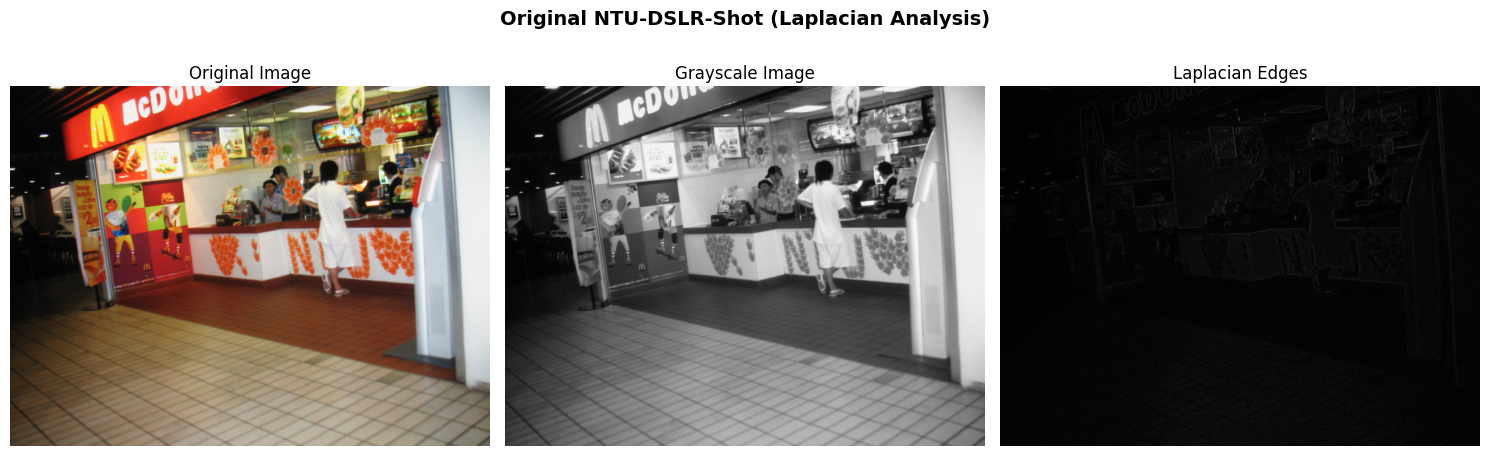

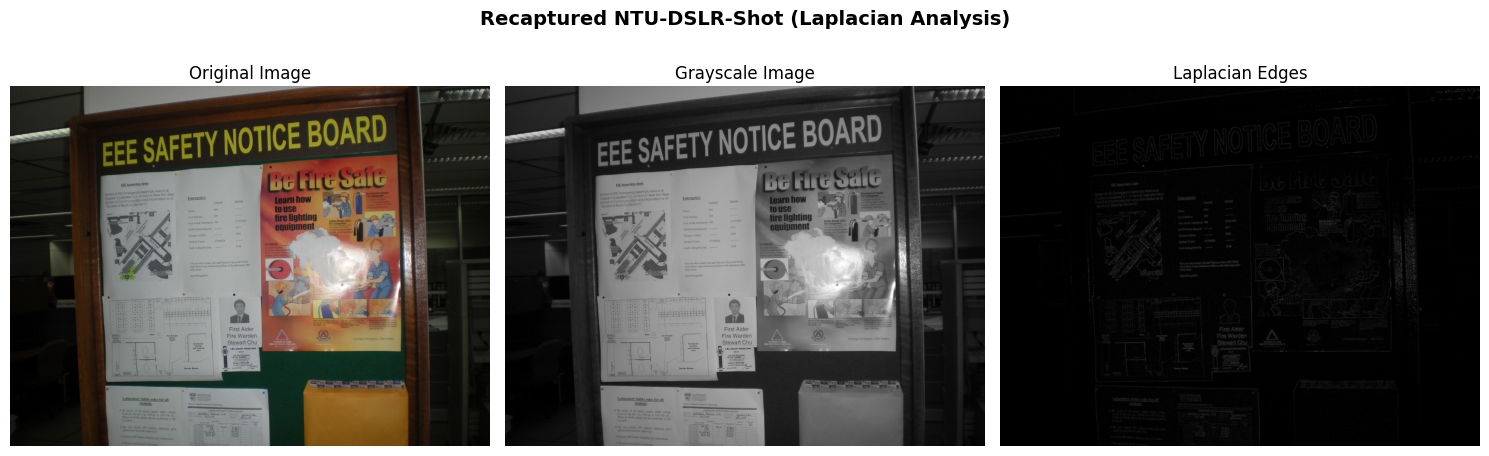

In [22]:
# Laplacian Analysis

# For original image
show_laplacian_transformation(
    "/content/drive/MyDrive/NTU-Roselab-Dataset/originals/CanonAcer/001.jpg",
    "Original NTU-DSLR-Shot (Laplacian Analysis)"
)

# For recaptured image
show_laplacian_transformation(
    "/content/drive/MyDrive/NTU-Roselab-Dataset/recaptures/zNikonS210/001.JPG",
    "Recaptured NTU-DSLR-Shot (Laplacian Analysis)"
)

## Android Captured-Images


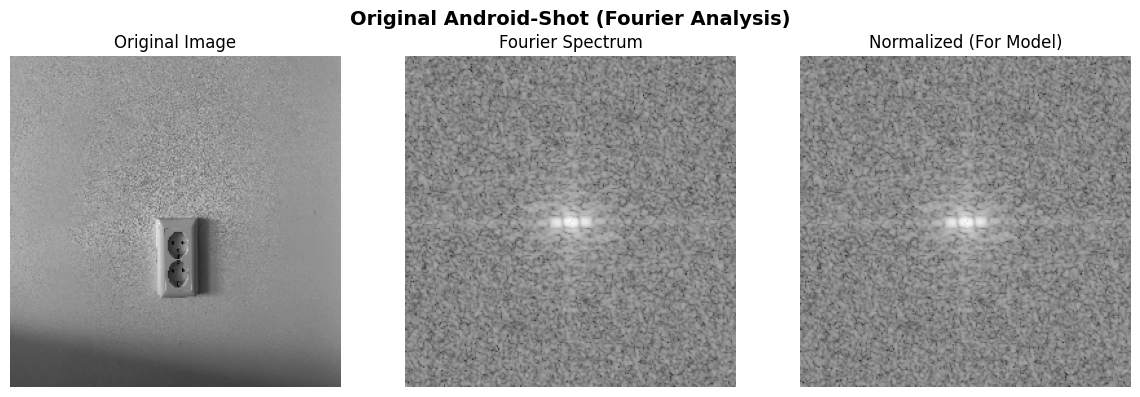

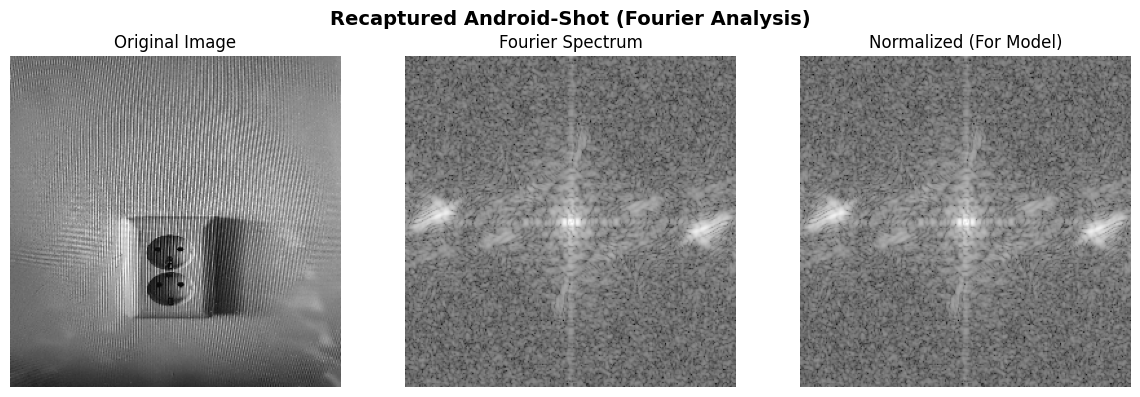

In [26]:
# Fourier Analysis

# For original image
fourier_analysis_view(
    "/content/drive/MyDrive/Testing-Nothing2a-Pics/sample_original_nothing2a.jpg",
    "Original Android-Shot (Fourier Analysis)"
)

# For recaptured image
fourier_analysis_view(
    "/content/drive/MyDrive/Testing-Nothing2a-Pics/sample_recaptured_nothing2a.jpg",
    "Recaptured Android-Shot (Fourier Analysis)"
)

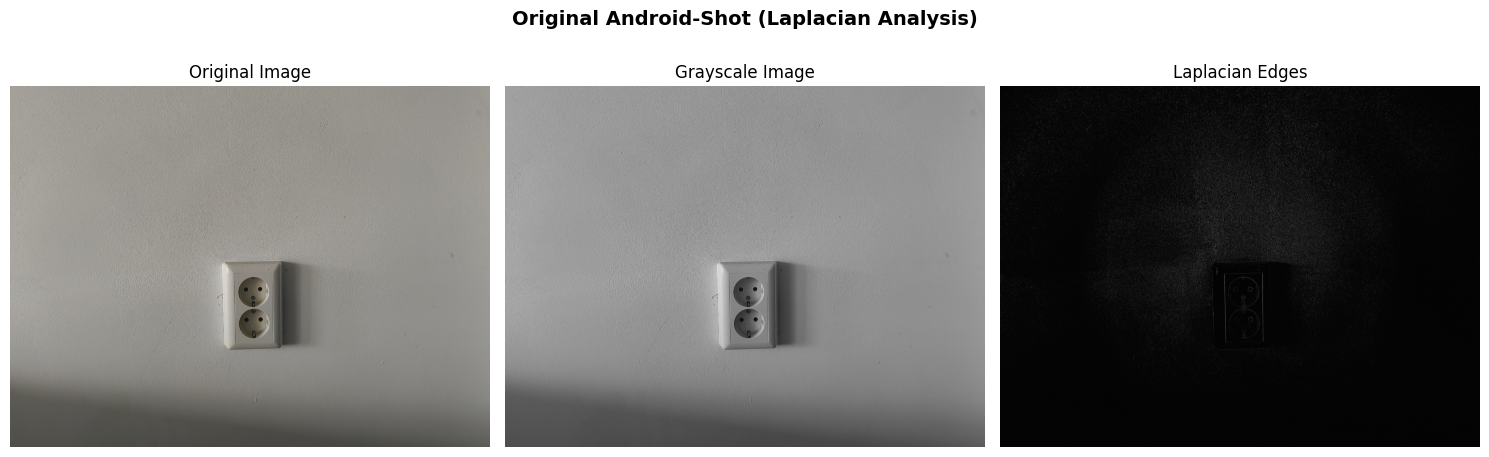

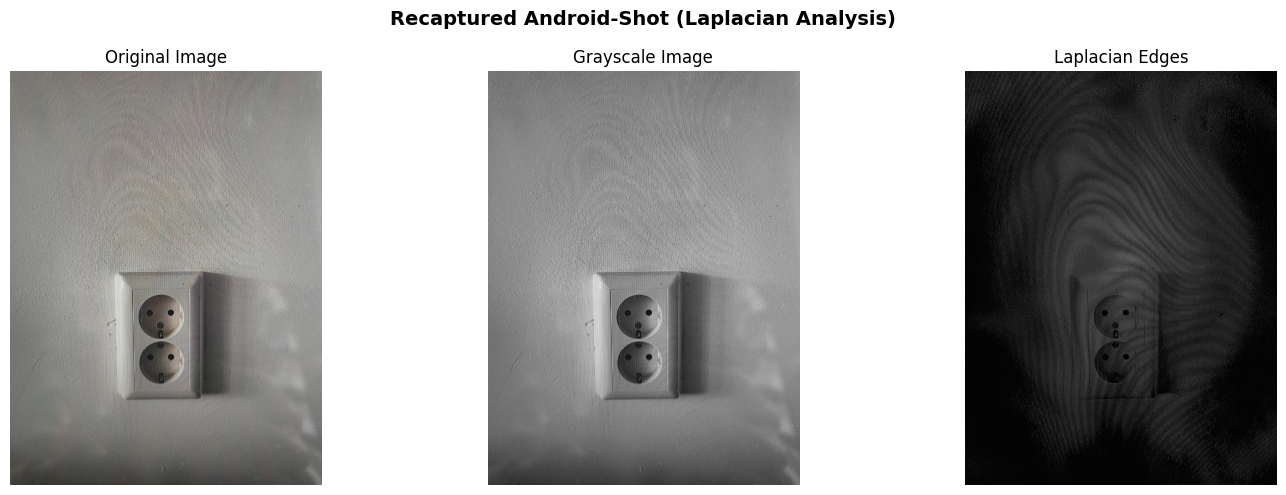

In [27]:
# Laplacian Analysis

# For original image
show_laplacian_transformation(
    "/content/drive/MyDrive/Testing-Nothing2a-Pics/sample_original_nothing2a.jpg",
    "Original Android-Shot (Laplacian Analysis)"
)

# For recaptured image
show_laplacian_transformation(
    "/content/drive/MyDrive/Testing-Nothing2a-Pics/sample_recaptured_nothing2a.jpg",
    "Recaptured Android-Shot (Laplacian Analysis)"
)

## Comparative Analysis Conclusion

### **NTU-Rose Lab Dataset vs Custom Smartphone Dataset**

#### **NTU-Rose Lab Dataset (Professional Recaptures):**
- **Stage-1 Analysis Results**: POOR DETECTION
- **Key Finding**: Basic Fourier and Laplacian methods FAIL to identify recaptures
- **Reason**: Professional recapture equipment produces minimal artifacts
- **Artifacts Detected**: None clearly visible
- **Conclusion**: Requires Stage-2 deep learning analysis

#### **Custom Smartphone Dataset (Screen Recaptures):**
- **Stage-1 Analysis Results**: EXCELLENT DETECTION
- **Key Finding**: Both methods CLEARLY identify recaptures
- **Reason**: Screen recapturing introduces strong visible artifacts
- **Artifacts Detected**: Prominent moire patterns, significant edge blurring
- **Conclusion**: Stage-1 basic analysis is sufficient

### **Critical Difference:**
The effectiveness of Stage-1 analysis depends entirely on **recapture quality**. Professional setups (NTU-Rose) minimize artifacts, while consumer setups (smartphone-to-screen) introduce clear detectable patterns.

### **Planning Stage-2 Deep Analysis**:
1. **Deep Learning Models** (CNN, ResNet)
2. **Advanced Frequency Analysis** (Wavelet transforms)
3. **Noise Pattern Analysis** (Sensor noise fingerprints)
4. **Color Channel Correlation**
5. **Machine Learning Classifiers**

### **Overall Conclusion:**
**Basic computer vision methods work well for consumer-grade recaptures but fail for professional-grade recaptures.** The choice between Stage-1 and Stage-2 analysis should be based on the expected recapture quality in the target application.

---
*Stage-1 Analysis: CONSUMER RECAPTURES ✓ | PROFESSIONAL RECAPTURES ✗*
*Next Step: ADVANCED AI ANALYSIS REQUIRED for professional datasets*